In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from keras.layers import *



Using TensorFlow backend.


In [2]:
RUN_NAME = "run 1 with 512 nodes"
logger = keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True
)

In [6]:
#loading the cifar10 train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# examine at the training data

print('\nshape of images:',x_train.shape)
print('\nlength of labels',len(y_train))
print('\nlabels:',y_train)

dist_train = np.zeros(10, dtype=np.int16)
for j in range(len(y_train)):
  dist_train[y_train[j]] += 1
 
print ('\nnumber of training cases for each category')
for i in range(10):
  print (i, dist_train[i])


shape of images: (50000, 32, 32, 3)

length of labels 50000

labels: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

number of training cases for each category
0 5000
1 5000
2 5000
3 5000
4 5000
5 5000
6 5000
7 5000
8 5000
9 5000


In [8]:
# Normalize data set
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
#convert to binary with keras built in function
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Creating Convolutional Cell Block

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Creating Densely Connected Cell Block

In [11]:
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [12]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
#train the model
history=model.fit(x_train,y_train,batch_size=64,epochs=2,validation_data=(x_test, y_test),shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 178s 4ms/step - loss: 0.8514 - accuracy: 0.7006 - val_loss: 0.7719 - val_accuracy: 0.7302
Epoch 2/2
50000/50000 [==============================] - 206s 4ms/step - loss: 0.7851 - accuracy: 0.7239 - val_loss: 0.7665 - val_accuracy: 0.7354


In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test, y_test),shuffle=True)

In [40]:
#train the model
model.fit(x_train,y_train,batch_size=64,epochs=30,validation_data=(x_test, y_test),shuffle=True,callbacks=[logger])


Train on 50000 samples, validate on 10000 samples


AttributeError: 'Sequential' object has no attribute '_get_distribution_strategy'

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='training loss', color='green')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, .3])
plt.legend(loc='upper right')

In [12]:
# plot the acccuracy
plt.figure(figsize=(8,8))
plt.plot(history.history['acc'], label='training accuracy',color='blue')
plt.plot(history.history['val_acc'], label = 'validation accuracy',color='red')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.])
plt.legend(loc='lower right')

NameError: name 'history' is not defined

<Figure size 576x576 with 0 Axes>

In [13]:
#evaluation

test_evaluation = model.evaluate(test_images, test_labels)
test_loss = test_evaluation[0]
test_acc = test_evaluation[1]

print ('\ntest loss: ',test_loss)
print ('test acc:  ', test_acc)
print ('errors:  ', int(10000*(1-test_acc)))

NameError: name 'test_images' is not defined

In [14]:
#save the trained network and weight
model_save= model.to_json()
file = Path("model_save.json")
file.write_text(model_save)
model.save_weights("trained_model.h5")

In [15]:
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

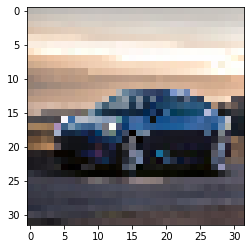

In [24]:
#making a prediction
img = image.load_img("tesla.jpg", target_size=(32, 32))
plt.imshow(img)
plt.show()

In [30]:
test1= image.img_to_array(img)
test_image = np.expand_dims(test1, axis=0)
result = model.predict(test_image)
single_result = result[0]
class_index = int(np.argmax(single_result))
class_name = single_result[class_index]
class_label = class_labels[class_index]
print("This is image is a ",class_label, class_name)

This is image is a  Car 1.0
